In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from patsy import dmatrices
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost  import CatBoostClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
data = pd.read_csv('hmelq.csv')

In [4]:
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [5]:
data_ = data.dropna() #remove all null columns' rows in dataset

In [6]:
dms = pd.get_dummies(data_[["reason","job"]])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [7]:
y=data_["value"]
X_=data_.drop(["value","reason","job"], axis=1).astype("float64")
X_.head()

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0.0,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0.0,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [8]:
X=pd.concat([X_,dms[["reason_DebtCon","reason_HomeImp","job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis=1)
X.head()

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,0.0,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,0.0,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [9]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.25)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
training=data_.copy()
print("training", training.shape)

X_train (1513, 18)
y_train (1513,)
X_test (505, 18)
y_test (505,)
training (2018, 13)


In [10]:
pca=PCA()
X_reduced_train=pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[ 1.85624782e-01,  3.34537729e-01, -1.97305423e+00,
         6.59306487e-01,  1.60266983e+00, -1.55700864e-01,
         1.08722781e-01, -2.53200803e-01,  5.42260109e-01,
        -3.89555633e-02,  7.55878031e-01, -1.40883632e-01,
         4.79246246e-01, -3.40169867e-01,  1.29445248e-01,
        -3.03746169e-01,  1.46008038e-15, -3.01420405e-17]])

In [11]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)#[0:6]

array([ 12.12,  23.65,  32.91,  40.5 ,  47.88,  54.65,  61.23,  67.11,
        72.37,  77.52,  82.36,  86.57,  90.66,  94.15,  97.28, 100.01,
       100.01, 100.01])

In [12]:
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train, y_train)
pcr_model.intercept_

106232.05287508262

In [13]:
pcr_model.coef_

array([ 3.99192165e+03,  2.56887686e+04,  8.17993664e+02, -7.22139432e+03,
        3.80122213e+00, -5.78199217e+03, -8.56135546e+02, -2.45633648e+03,
        1.40885054e+03,  4.66663140e+03, -3.44532124e+03,  5.54840743e+03,
       -1.00052120e+03,  1.31305267e+04, -2.07488764e+04,  2.58192039e+04,
       -1.50299905e-19, -7.09249709e-20])

In [14]:
y_pred=pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([ 92348.89148984,  41253.70572614, 130233.71111097,  58086.96805465,
       134342.03128118])

In [15]:
np.sqrt(mean_squared_error(y_train,y_pred))#trainin mean square error

24077.703168938937

In [16]:
data_["value"].mean()


106899.24479682854

In [17]:
r2_score(y_train,y_pred)

0.7958066375832732

In [18]:
pca2=PCA()
X_reduced_test=pca2.fit_transform(scale(X_test))
y_pred=pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test,y_pred))
#testin mean square erroru, yukardeki trainin mean square erroru ve test in 
#mean square arasındaki benzerlik kurduğumuz modelin doğruluğunu ile doğru orantı var

93223.56356470456

In [19]:
pcr_model=lm.fit(X_reduced_train[:,0:6],y_train)#x in ilk 6 sını alarak bir pcr_model fit ettik
print(pcr_model.intercept_)#bu modelin interceptini çektik
print(pcr_model.coef_)#bu modelin coeficiantlarını çekiyoruz

106232.05287508262
[ 3.99192165e+03  2.56887686e+04  8.17993664e+02 -7.22139432e+03
  3.80122213e+00 -5.78199217e+03]


In [20]:
y_pred=pcr_model.predict(X_reduced_train[:,0:6])#y predict ederker x in train den ilk altısını alıp tahmin ediyoruz
print(np.sqrt(mean_squared_error(y_train,y_pred)))# oluşturduğumuz predictionin mse runu yazdırdık
y_pred=pcr_model.predict(X_reduced_test[:,0:6])# test verisi ile prediction yaptık
print(np.sqrt(mean_squared_error(y_test,y_pred)))# ve bu tahminin erroruna baktık
#benzerlik oranları kurduğumuz modelin doğruluğu ile doğru orantılı

36361.12771891772
85592.99466306632


In [21]:
cv_10=model_selection.KFold(n_splits=10,shuffle=True, random_state=1)
#10 veri split edip bir cross validation alt kümesi çekiyoruz

In [22]:
RMSE=[]
for i in np.arange(1,X_reduced_train.shape[1]+1):
    score=np.sqrt(-1*model_selection.cross_val_score(lm,X_reduced_train[:,:i],y_train.ravel(),cv=cv_10,scoring="neg_mean_squared_error").mean())
    RMSE.append(score)
# uzunluğu kadar bu pca'lar için linear regression model oluşturup cross valudation yapıp 
# mean squared errorunu buluyoruz ve error hep negatif geldiği için - ile çarpıyoruz sqrt yapıp score hesaplayaacağız
RMSE

[53028.41292060349,
 37995.14042176995,
 38020.96199206463,
 37094.94999944585,
 37122.11276418379,
 36585.69849180317,
 36600.17681619485,
 36537.39178531476,
 36549.73687532943,
 36342.98445857902,
 36266.62572681438,
 35932.224488138025,
 35941.80089715796,
 34466.52201222152,
 30681.87745127836,
 24617.51725444373,
 24617.517254443734,
 24617.51725444373]

Text(0.5,1,'PCR Model Tuning for value')

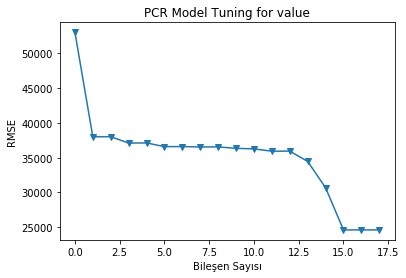

In [23]:
plt.plot(RMSE, "-v")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("PCR Model Tuning for value")

In [24]:
y=data_["bad"]
X_=data_.drop(["bad","reason","job"], axis=1).astype("float64")
X_.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [25]:
X=pd.concat([X_,dms[["reason_DebtCon","reason_HomeImp","job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [26]:
loj = sm.Logit(y,X) # Logistic regression
loj_model = loj.fit() # set  the model
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.228362
         Iterations 9


C:\Users\Ayse Akca\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2001
Method:                           MLE   Df Model:                           16
Date:                Wed, 25 Sep 2019   Pseudo R-squ.:                  0.2346
Time:                        12:20:19   Log-Likelihood:                -460.84
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 1.039e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.73e-05   1.05e-05     -1.640      0.101    -3.8e-05    3.37e-06
mortdue        -4.777e-06   4.76e-06     -1.004      0.315   -1.41e-05    4.55e-06
value           4.089e-06   4.06e-06      1.006      0.314   -3.87e-06    1.21e-05
yoj               -0.0109      0.013     -0.854      0.393      -0.036       0.014
derog              0.5708      0.130      4.382      0.000       0.315       0.826
delinq             0.7985      0.095      8.448      0.000       0.613       0.984
clage             -0.0046      0.001     -3.354      0.001      -0.007      -0.002
ninq               0.1119      0.049      2.303      0.021       0.017       0.207
clno              -0.0286      0.011     -2.627      0.009      -0.050      -0.007
debtinc            0.1143      0.014      8.222      0.000       0.087       0.142
reason_DebtCon    -3.7938        nan        nan        nan         nan         nan
reason_HomeImp    -3.8593        nan        nan        nan         nan         nan
job_Mgr           -1.4722        nan        nan        nan         nan         nan
job_Office        -2.0716        nan        nan        nan         nan         nan
job_Other         -1.5260        nan        nan        nan         nan         nan
job_ProfEx        -1.5377        nan        nan        nan         nan         nan
job_Sales         -0.2487        nan        nan        nan         nan         nan
job_Self          -0.7970        nan        nan        nan         nan         nan
==================================================================================
"""

In [27]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
loj_model.intercept_ #give beta0

array([-0.0086955])

In [29]:
loj_model.coef_

array([[-2.83163861e-05, -4.89389252e-06, -1.61418650e-06,
        -3.31738339e-02,  2.01031589e-02,  3.64166548e-02,
        -7.28657597e-03,  1.07646587e-02, -2.92930551e-02,
         2.39167894e-02, -5.62310945e-03, -3.07239212e-03,
        -5.37405428e-05, -4.14770080e-03, -5.33142381e-03,
        -1.64484468e-03,  1.14343216e-03,  1.33877610e-03]])

In [30]:
y_pred=loj_model.predict(X)

In [31]:
c=confusion_matrix(y,y_pred)
c

array([[1835,    5],
       [ 178,    0]], dtype=int64)

In [32]:
precision= c[1][1]/(c[0][1]+c[1][1])
precision 

0.0

In [33]:
tpr=c[1][1]/(c[1][0]+c[1][1])
tpr#True Positive Rate

0.0

In [34]:
accuracy_score(y,y_pred)

0.9093161546085233

In [35]:
print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95      1840
          1       0.00      0.00      0.00       178

avg / total       0.83      0.91      0.87      2018



In [36]:
loj_model.predict(X)[0:10] #default treshold is 0.50

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
loj_model.predict_proba(X)[0:10][:,0:2]# sum of the every row equal to 1 and, it gives us probability of value of y is 1 or 0.
# first column  represents 0s prob and second 1s probability

array([[0.94378703, 0.05621297],
       [0.82295558, 0.17704442],
       [0.98250686, 0.01749314],
       [0.83375945, 0.16624055],
       [0.85176979, 0.14823021],
       [0.97589329, 0.02410671],
       [0.83935067, 0.16064933],
       [0.96791113, 0.03208887],
       [0.76821404, 0.23178596],
       [0.95386306, 0.04613694]])

In [38]:
y[0:10]#we control the predicted y values and real y values

153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
Name: bad, dtype: int64

In [39]:
y_probs=loj_model.predict_proba(X)
y_probs=y_probs[:,1]

In [40]:
y_probs[0:10]

array([0.05621297, 0.17704442, 0.01749314, 0.16624055, 0.14823021,
       0.02410671, 0.16064933, 0.03208887, 0.23178596, 0.04613694])

In [41]:
y_pred=[1 if i> 0.5 else 0 for i in y_probs] # same function with loj_model.predict(X)[0:10], but in the function we control the 
#treshold value handly

In [42]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [43]:
confusion_matrix(y,y_pred)

array([[1835,    5],
       [ 178,    0]], dtype=int64)

In [44]:
accuracy_score(y,y_pred)

0.9093161546085233

In [45]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.05621297, 0.17704442, 0.01749314, 0.16624055, 0.14823021])

In [46]:
logit_roc_auc=roc_auc_score(y,loj_model.predict(X))
logit_roc_auc #Proximity to 1 indicates goodness of model

0.4986413043478261

In [47]:
fpr, tpr, tresholds=roc_curve(y,loj_model.predict_proba(X)[:,1])#true positif rate(tpr) , false positif rate(fpr)

In [54]:
print(fpr[0:5])
print(tpr[0:5])
print(tresholds[0:5])

[0.         0.00054348 0.00380435 0.00380435 0.0048913 ]
[0.         0.         0.         0.00561798 0.00561798]
[1.53618315 0.53618315 0.47634515 0.46766239 0.45658186]


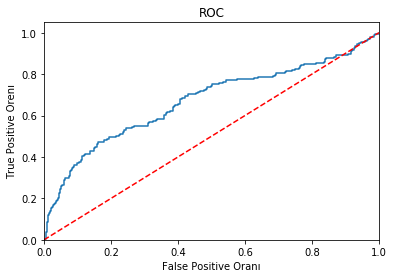

In [55]:
plt.figure()
plt.plot(fpr,tpr, label='AUC(area=%0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Oranı")
plt.ylabel("True Positive Orenı")
plt.title("ROC")
plt.show()